# Linear Regression

* **Regression** in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand.

### 1. Simple Linear Regression

Simple Linear regression is a method for predicting a **Label** using a **Single Feature**. The mathematical equation is:

$y = \beta_0 + \beta_1 x$

Where
- $y$ -- the target variable
- $x$ -- the feature
- $\beta_1$ -- the coefficient of x
- $\beta_0$ -- the intercept

$\beta_0$ and $\beta_1$ -- **model coefficients**. 

To create a model, we must **"Learn" the values of these coefficients**.

#### Learning - Estimating  Model Coefficients

The coefficients are calculated by finding the **Bst Ft Lne**. 

**Best Fit Line** is the Line whose sum of squares of residuals is minimum.
    
    Q1. What is Residual ?
    Q2. What is Sum of Squares of residuals ?
    Q3. How do we minimize it ?

1. Residual is the distance between the actual Y and the predicted Y, as shown below:
<img src="residual.png" width="250">


Mathematically,

1. Residual Of one Point   
$$  r_i = y_i - (mx_i + b) $$ 

1.1. Sum Of  residuals   
$$ \sum_{i=1}^n r_i = \sum y_i - (mx_i + b) $$  

2. Sum of Squares of Residuals
$$ R(x) = \sum r_i^2 = \sum (y_i - (mx_i + b))^2 $$

3. Now we can minimize the residual by finding its derivative and equating that to 0. and as the Residual is a function of both m and b we will partially differentiate the function with them.

Partial derivatives are :
<img src="partialDerivatives.png" width="230">

Now Equating both of these Eqns to 0, to get the Minima of the Residue.


and after calulating finally we get:
<img src="matrix1.png" width="250">

The new values for 'slope' and 'intercept' are caluclated as follows :

Initially the value of intercept and slope is chosen randomly, and then improved as follows.

Repeat untill convergence **{**

$$  intercept = intercept - \alpha  \times  \frac {\sum Loss}{n}$$

$$ Slope = Slope - \alpha  \times  \frac {\sum Loss}{n}    $$  **}**

- $\alpha$ is the learning rate, (Google Tensor board recommends a Learning rate between 0.00001 and 10. Generally a smaller learning rate is recommended to avoid overshooting
- n - No. of samples

Now as we have the values for m and b, i.e. our model is ready.

### But,  how well the model fits our data ?
### $R^2$ statistics

The R-squared statistic provides a measure of fit. 

it always takes on a value between 0 and 1. 

In simple words, it represents how much of our data is being explained by our model.

Mathematically $R^2$ statistic is calculated as :
$$ R^2  = 1 - \frac{RSS}{TSS}$$

Where RSS:  is  the Residual Sum of Squares and is given as :
$$ RSS = \sum_{i=1}^n (y_i - \hat y_i)^2 $$
- $\hat y$ - Predicted y values                                                                

TSS:  is  the Total Sum of Squares and given as :
$$ TSS = \sum (y_i - \bar y)^2 $$
- $\bar y$ - Mean of Actual y values

The closer the value of $R^2$ is to 1 the better the model fits our data. If $R^2$ comes below 0 (which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.



### Limitation :

<img src="adjr.PNG" width="400">
As No. of Features $\uparrow$ - Value of RSS $\downarrow$ - and value of $R^2 \uparrow$

Even if we add weakly correleted features to the data, the value of $R^2$ will increase, but that doesn't mean that our model is predicting better results.

To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data. 

### Adjusted $R^2$

$$ R^2_{Adjusted} = 1 - \frac{(1-R^2)(N-1)}{N-1-p}$$

Where:
* N - Total sample size
* p = No. of predictors

In the equation above, when p = 0, we can see that adjusted $R^2$ becomes equal to $R^2$.
Thus, adjusted $R^2$  will always be less than or equal to $R^2$, and it penalises the excess of independent variables which do not affect the dependent variable. but this again generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

a better approach to feature selection is**Cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

## Model Confidence

**Question:** Is linear regression a low bias/high variance model or a high bias/low variance model?

**Answer:** It's a High bias/low variance model. 

Even after repeated sampling, the best fit line will stay roughly in the same position (i.e. low variance), but the average of the models created after repeated sampling won't do a great job in capturing the perfect relationship (i.e. high bias). Low variance is helpful when we have big training data! 

If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 

If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.


### Hypothesis Testing and p-values
The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence $\beta_1$ equals zero).
- **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, $\beta_1$ is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval **does not include zero**. The **p-value** represents the probability of the coefficient actually being zero.

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

## Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

* **Definition :** We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

#### Why Should We Care About Multi-Collinearity?

* The coefficients in a Linear Regression model represent the change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.

* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.

* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 

* Hence Ideally We should look for 0 Correlation, but practically we try to get a value as close as **0** as possible
  
      -0.1 to -0.3 & 0.1 to 0.3  Low Correlation
      -0.3 to -0.5 & 0.3 to 0.5  Medium Correlation
      -0.5 to -1.0 & 0.5 to 1    High Correlation   

#### Detecting the Multi Colinearity

1. __Correlation Matrices and Plots:__ for correlation between all the X variables. The plot shows the extent of correlation amongst the independent variables. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.

* Peason Correlation Coefficient should be close to '0'.

* __Variance Inflation Factor:__ Regression of one X variable against another X variables.

     $$ VIF= \frac {1}{(1-R squared)}$$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.


#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis

### Regularization 

When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  

**Regularization helps sort this overfitting problem** by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.

In a linear equation, we do not want huge weights/coefficients, Because a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. 

Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

$$ RSS = \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2 $$

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:

#### 6.2.1. LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 $$ Regularization =  \lambda  \sum  |\beta_j| $$

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

$$ = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^p |\beta_j| $$
$$ = RSS + \lambda \sum_{j=1}^p |\beta_j| $$

#### 6.2.2. Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

$$ Regularization =  \lambda \sum  |\beta_j^2| $$

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:
$$ RSS + \lambda \sum_{j=1}^p |\beta_j^2|  $$

The value of lambda can be anything and should be calculated by cross validation as to what suits the model.

#### 6.2.3. Difference between Ridge and Lasso

Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. 

Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. 

This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.

#### 6.2.4. Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

<img src="elasticNet.PNG" width="600">
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).

#### 6.2.5. Why use Regularization?

Regularization helps to reduce the variance of the model, without a substantial increase in the bias. 

If there is variance in the model that means that the model won’t fit well for dataset other than training data. 

The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.

The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.

#### 6.2.6.  **When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**

According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. 

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless feature's weights down to zero as we have discussed. 

In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

### Polynomial Regression

Simply a polynomial is an aggregation of many monomials(or Variables). A simple polynomial equation can be written as:
$$y = {a+bx + cx^2+...+nx^n+...}$$

So, Polynomial Regression can be defined as a mechanism to predict a _dependent variable_ based on the polynomial relationship with the _independent variable_.

 In the equation, _$$y= {a+bx + cx^2+...+nx^n+...}$$_ the maximum power of 'x' is called the degree of the polynomial equation.

### When to use Polynomial Regression?

If the graph between a dependent and independent variables looks like:
<img src="PolynomialGraph.png" width="200">

It means that the relationship between X and Y can't be described Linearly.
Then comes the time to use the Polynomial Regression.

We can generalize the matrix obtained for Linear Regression, for an equation of 'n' coefficients (in y=mx+b, m and b are the coefficients) as follows: 
![image.png](generalEquation.png)

Where m is the _degree_(maximum power of x) of the polynomial and n is the number of observation points.

The above matrix results in the general formula for Polynomial Regression.

Let's do step by step implementation of linear regression Algorithm to know the Structure of code.

## Simple Linear Regression Equation

$$Y_1=b_0 + b_1X_1$$

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\Priyanka\Downloads\Machine+Learning+A-Z+(Codes+and+Datasets) (2)\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 4 - Simple Linear Regression\python\Salary_data.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values                      
                      

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

# Training the Simple Linear Regression model on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)

# Visualising the Training set results

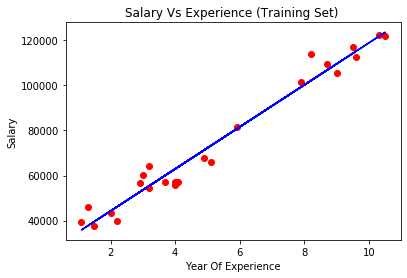

In [7]:
plt.scatter(X_train,Y_train,color ='red')
plt.plot(X_train,regressor.predict(X_train),color ='blue')
plt.title('Salary Vs Experience (Training Set) ')
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results

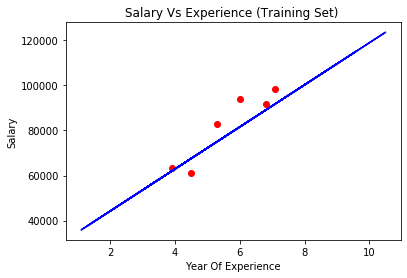

In [8]:
plt.scatter(X_test,Y_test,color ='red')
plt.plot(X_train,regressor.predict(X_train),color ='blue')
plt.title('Salary Vs Experience (Training Set) ')
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Regression--

Equation Of Multiple Linear Regression--Which is use for a dataset contain More No of Feature Column 

$$Y_1=b_0 + b_1X_1+b_2 X_2$$


## Steps For Model Building

1. Importing Liabraries

2. Importing Dataset

3. Data Preprocessing--Check Missing Data,Categorical data, On Categorial data Do One hot encoding, Techniques to handle 
   missing data , Replace by Mean median Mode.

4. Splitting Dataset Into Training and Test Dtaset

5. training model on Train Set

6. Predict Test set

7. Visualize Train Set Result

8. Visualize Test Set Result




## Importing Liabraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv(r'C:\Users\Priyanka\Downloads\Machine+Learning+A-Z+(Codes+and+Datasets) (2)\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 5 - Multiple Linear Regression\python\50_Startups.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:, -1].values 

In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Encoding Categorical Data(State) using One Hot Encoding Technique 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder= 'passthrough')
X=np.array(ct.fit_transform(X))

In [13]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## Splitting the datset into training and testing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [15]:
X_test

array([[0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 0.0, 28754.33, 118546.05, 172795.67],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 1.0, 0.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23]], dtype=object)

## Training Multiple Regression Model On Training Datasert 


## 5 Types To Build a model

1) All in--Considering all features in multiple regression

2) Backward Eliminator

3) Forward  Selection

4) Bidirectional  Elimination

5) Score Comparison

Here We don't have to worry about dummy variable trap after one hot encoding, also selection of model from above 5 types, this all things will be done by scikit learn library itself.

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predecting the test Set Result

In [18]:
## For Comparing test andY_pred = regressor.predict(X_test)
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [19]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


# Polynomial Linear Regression

Polynomial --Degree of X will be different, Square,Cube and so on but slops/Coefficients are Linear hence we called it Polynomial Linear Regression 

$$Y_1=b_0 + b_1X_1+b_2 X_1^2$$

## Importing Library and dataset



In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Priyanka\Downloads\Machine+Learning+A-Z+(Codes+and+Datasets) (2)\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 6 - Polynomial Regression\python\Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values               #Selecting Independent Variable
Y = dataset.iloc[:, -1].values                 #Selecting dependent Variable
 

In [49]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


As Dataset Contain only 10 Records and Independent Column Position And Level Both Are Fixed Hence here We Are not going to split our Data Into Training And Testing

## Training the Linear Regression Model On the Whole Dataset


In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression Model On the Whole Dataset

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly   = poly_reg.fit_transform(X)                          # we 1st transform our Level feature to degree 4 ,fit and transform X data on Polynomial Regression Model, then Do Fit on linear regression model
lin_reg  =  LinearRegression()
lin_reg.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

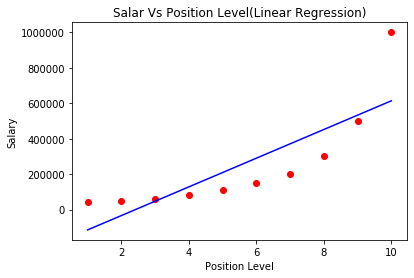

In [52]:
plt.scatter( X, Y, color ='red')        
plt.plot(X,regressor.predict(X), color='Blue')
plt.title('Salar Vs Position Level(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

We can see that only two record has correctly predicted by linear regression model, Hence will try polynomial regression 

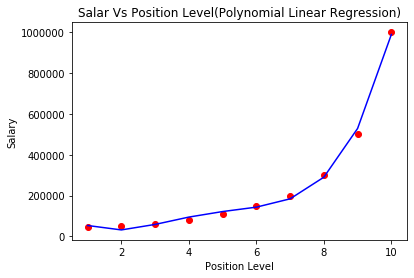

In [53]:
plt.scatter( X, Y, color ='red')
plt.plot(X, lin_reg.predict(X_poly), color='Blue')
plt.title('Salar Vs Position Level(Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting New data result On Linear Model


In [54]:
regressor.predict([[6.5]])      # Giving Inaccurate Prediction As we can see from above Graph, For 6.5 Position level Expected Salary in Between 15K to 20K

array([330378.79])

## Predicting New data result On Linear Model

In [55]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

Congratulation!! Our Polynomial Regression Model has predicted correct result compare to linear regression 